In [1]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk

In [2]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [11]:
compliance_report=[]

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Senthilkumar
[nltk_data]    |     Arjunan\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Senthilkumar
[nltk_data]    |     Arjunan\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Senthilkumar
[nltk_data]    |     Arjunan\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Senthilkumar
[nltk_data]    |     Arjunan\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |    

True

In [6]:
for filename in os.listdir('Bank_Compliance_Data'):
    print(filename)

complaints.csv


In [7]:
df=pd.read_csv("Bank_Compliance_Data/complaints.csv")
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [8]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)

In [9]:
df.head()

,Complaint_No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [10]:
len(df)

162421

In [31]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [32]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
for filename in os.listdir('Bank_Compliance_Data'):
  file_path=os.path.join('Bank_Compliance_Data',filename)
  with open(file_path,encoding='unicode_escape') as f:
    corpus=f.read()
  raw_sent=sent_tokenize(corpus)
  for sent in raw_sent:
    words = simple_preprocess(sent)
    filtered_words = [word for word in words if word not in stop_words]
    compliance_report.append(filtered_words)

In [34]:
len(compliance_report)

2

In [35]:
compliance_report

[['product',
  'narrative',
  'credit_card',
  'purchase',
  'order',
  'day',
  'shipping',
  'amount',
  'receive',
  'product',
  'week',
  'sent',
  'followup',
  'email',
  'exact',
  'verbiage',
  'paid',
  'two',
  'day',
  'shipping',
  'received',
  'order',
  'company',
  'responded',
  'im',
  'sorry',
  'inform',
  'due',
  'unusually',
  'high',
  'order',
  'volume',
  'order',
  'shipped',
  'several',
  'week',
  'stock',
  'since',
  'early',
  'due',
  'high',
  'demand',
  'although',
  'continuing',
  'take',
  'order',
  'guaranteeing',
  'receive',
  'order',
  'place',
  'due',
  'time',
  'mask',
  'order',
  'exact',
  'shipping',
  'date',
  'right',
  'however',
  'guarantee',
  'ship',
  'soon',
  'soon',
  'delivers',
  'product',
  'getting',
  'small',
  'shipment',
  'shipping',
  'first',
  'come',
  'first',
  'served',
  'basis',
  'appreciate',
  'patience',
  'fulfill',
  'order',
  'quickly',
  'recommend',
  'keeping',
  'order',
  'lose',
  'plac

In [36]:
custom_model = gensim.models.Word2Vec(window=10,min_count=3,workers=150)

In [37]:

custom_model.build_vocab(compliance_report)

In [38]:
custom_model.corpus_count

2

In [39]:
custom_model.epochs

5

In [41]:
custom_model.train(compliance_report,total_examples=custom_model.corpus_count,epochs=custom_model.epochs)

(100000, 130250540)

In [44]:
custom_model.wv.most_similar('compliance')

[('closed', 0.9127865433692932),
 ('account', 0.912406325340271),
 ('ending', 0.91215580701828),
 ('xxxxxxxx', 0.9105790257453918),
 ('saving', 0.9090267419815063),
 ('carrying', 0.906900942325592),
 ('froze', 0.904667317867279),
 ('started', 0.903320848941803),
 ('balance', 0.9025131464004517),
 ('checking', 0.9021857380867004)]

In [45]:
custom_model.wv['payment']

array([-0.44861275,  0.7176701 ,  0.38401338, -0.38478023,  0.41121662,
       -0.52647114,  0.50574124,  1.1356505 , -0.983408  , -0.557259  ,
       -0.11729161, -2.0784605 , -0.19842897,  0.12931716, -0.7452558 ,
       -1.108577  , -0.23952973, -1.7241688 , -0.22141692, -2.2836602 ,
       -0.30562505, -0.18503258,  0.41662616, -0.11583795, -0.8017845 ,
       -0.20846826, -0.8048942 , -0.601697  , -0.53349054, -0.468651  ,
        0.94532436,  0.9676212 , -0.58385885, -0.3683073 ,  0.42383978,
        1.4755107 , -0.16504066, -0.5869813 , -1.4377303 , -1.31179   ,
        1.5370777 , -0.5269084 , -0.7115983 ,  0.5793712 ,  1.1406407 ,
        0.09249096, -0.39536828,  0.46126682,  0.24062987,  0.16278368,
        0.2815875 , -0.24226548,  0.40863162, -0.08779917, -1.5137948 ,
       -0.36877197, -0.05060266, -0.337651  , -0.6343719 , -0.08758436,
        0.62574005,  0.82173526,  0.5052055 ,  0.11562362, -1.3319274 ,
        0.07512927,  0.35093066,  0.82110006, -1.1219934 ,  0.33

In [49]:
custom_model.wv.doesnt_match(['payment','cash','money',])

'payment'

In [53]:
custom_model.wv.similarity('cash','mortgage')

0.99908805

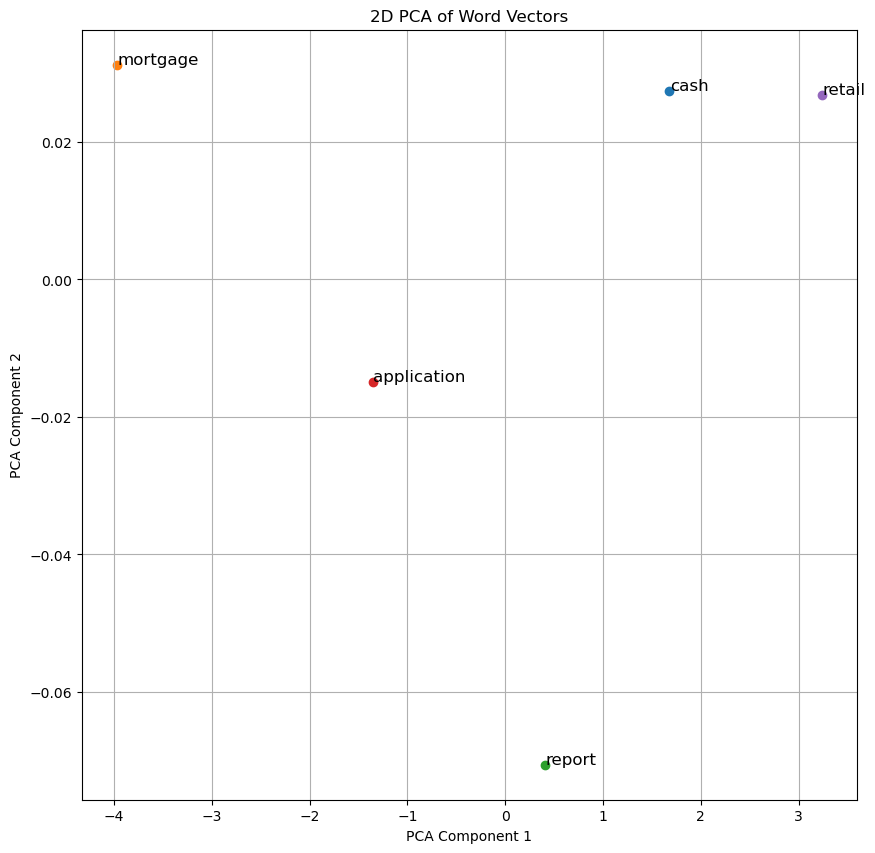

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['cash','mortgage','report','application','retail']
word_vectors = [custom_model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

x_range = max(abs(word_vectors_2d[:, 0]))
y_range = max(abs(word_vectors_2d[:, 1]))
x_offset = x_range * 0.001
y_offset = y_range * 0.001

# Plot the 2D vectors with labels
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1],)  # Plot the point
    plt.text(word_vectors_2d[i, 0] + x_offset, word_vectors_2d[i, 1] + y_offset,  # Offset text dynamically
             word, fontsize=12)  # Add word label
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()